In [1]:
import pandas as pd
Full_df = pd.read_csv("data.csv")

In [17]:
# import essential libraries
import os
import time
import gradio as gr
import pickle
import numpy as np
from numpy import arange
from numpy import absolute
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pylab import * # For adjusting frame width only
from pprint import pprint
from scipy.interpolate import griddata
from itertools import cycle
from collections import defaultdict
from IPython.display import Image
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import uniform, randint, expon, loguniform
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict


# import models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn. gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import random as rn

/Users/sina/Anaconda/anaconda3/envs/env.cladnet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Full_df

,Powder Material,Substrate Material,Beam Radius,P_input (W),v_l (mm/s),Pf_Ts (g/mm),E(j/mm3),Height (um),Depth (um),Width (um),Area (um2),Contact angle,Max Temp,dilution,Meltpool_label
0,316L,316L,1.4,500,4.23,0.0059,19.206309,121.41,220.53,810.39,58100.0,147.40,2349.94,0.64,Undesirable Shape
1,316L,316L,1.4,500,4.23,0.0071,19.206309,142.96,243.99,836.94,65200.0,146.38,2415.41,0.63,Undesirable Shape
2,316L,316L,1.4,500,4.23,0.0083,19.206309,163.01,271.87,879.53,72400.0,144.68,2478.45,0.63,Undesirable Shape
3,316L,316L,1.4,500,4.23,0.0094,19.206309,181.97,288.32,909.04,79400.0,144.81,2538.46,0.61,Undesirable Shape
4,316L,316L,1.4,500,4.23,0.0106,19.206309,199.70,304.77,936.84,85900.0,142.97,2594.89,0.60,Undesirable Shape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,316L,316L,1.4,1250,12.69,0.0071,16.005258,189.17,541.69,1457.92,263000.0,157.92,4505.25,0.74,Undesirable Shape
320,316L,316L,1.4,1250,12.69,0.0083,16.005258,215.68,569.45,1481.27,274000.0,156.09,4612.45,0.73,Undesirable Shape
321,316L,316L,1.4,1250,12.69,0.0094,16.005258,239.96,584.78,1509.91,285000.0,154.43,4711.20,0.71,Undesirable Shape
322,316L,316L,1.4,1250,12.69,0.0106,16.005258,263.44,609.76,1535.26,296000.0,153.22,4810.17,0.70,Undesirable Shape


## **Utils**

In [4]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [5]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None

In [6]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [7]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [8]:
'''
Make frame thicker, make tick pointing inside, make tick thicker
default frame width is 2, default tick width is 1.5
'''
def frame_tick(frame_width = 2, tick_width = 1.5):
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(frame_width)
    plt.tick_params(direction = 'in', 
                    width = tick_width)

'''
legend:
default location : upper left
default fontsize: 8
Frame is always off
'''
def legend(location = 'upper left', fontsize = 8):
    plt.legend(loc = location, fontsize = fontsize, frameon = False)
    
'''
savefig:
bbox_inches is always tight
'''
def savefig(filename):
    plt.savefig(filename, bbox_inches = 'tight')
    
dpi = 300

## **Depth model**

In [9]:
df_depth = Full_df.drop(columns=['Powder Material', 'Substrate Material', 'Beam Radius', 'Height (um)','Width (um)','Area (um2)','Contact angle', 'Max Temp', 'dilution', 'Meltpool_label'])
df_depth

,P_input (W),v_l (mm/s),Pf_Ts (g/mm),E(j/mm3),Depth (um)
0,500,4.23,0.0059,19.206309,220.53
1,500,4.23,0.0071,19.206309,243.99
2,500,4.23,0.0083,19.206309,271.87
3,500,4.23,0.0094,19.206309,288.32
4,500,4.23,0.0106,19.206309,304.77
...,...,...,...,...,...
319,1250,12.69,0.0071,16.005258,541.69
320,1250,12.69,0.0083,16.005258,569.45
321,1250,12.69,0.0094,16.005258,584.78
322,1250,12.69,0.0106,16.005258,609.76


In [10]:
X_d = df_depth.drop(["Depth (um)"], axis = 1)   #independent features
y_d = df_depth["Depth (um)"]                 #dependent features

In [11]:
#splitting the data
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state= 42)

In [12]:
#checking the shape of our train set and test set

print("Training set shape: {}".format(x_train_d.shape))
print("Test set shape: {}".format(x_test_d.shape))
print("Training label set shape: {}".format(y_train_d.shape))
print("Test label set shape: {}".format(y_test_d.shape))

Training set shape: (259, 4)
Test set shape: (65, 4)
Training label set shape: (259,)
Test label set shape: (65,)


In [13]:
# get a copy of y_test
y_test_real_d = y_test_d

scaler = MinMaxScaler()

X_train_d = scaler.fit_transform(x_train_d)
X_test_d = scaler.transform(x_test_d)

In [14]:
# Gradient Boosting Regressor

GBR_d = GradientBoostingRegressor(n_estimators=916, learning_rate=0.01, max_features='sqrt',
                                max_depth=100, min_samples_split=2, min_samples_leaf=1, random_state=1)

GBR_d.fit(X_train_d, y_train_d)

y_test_predict_d = GBR_d.predict(X_test_d)
y_train_predict_d = GBR_d.predict(X_train_d)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train_d, y_train_predict_d)), 
      (metrics.r2_score(y_test_d, y_test_predict_d))))

GBR_d_R2 = metrics.r2_score(y_test_d, y_test_predict_d)
GBR_d_MAE = metrics.mean_absolute_error(y_test_d, y_test_predict_d)

GBR_d_metrics = get_regression_metrics('Gradient Boosting Regression', y_test_d, y_test_predict_d)
GBR_d_metrics

R^2 training: 1.000, R^2 test: 0.981


,Gradient Boosting Regression
Root Mean Squared Error,24.846820
Mean Absolute Error,20.058478
R^2,0.980617
Explained Variance,0.980959


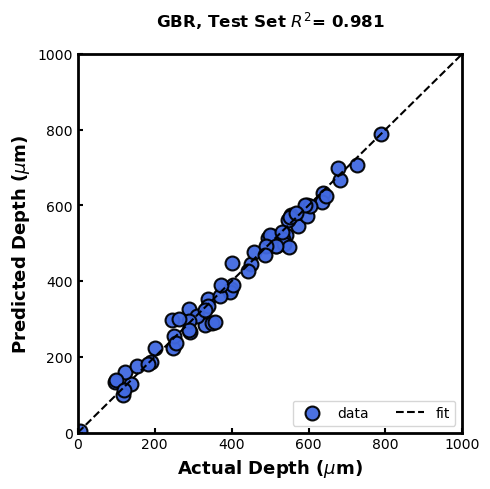

In [15]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('GBR, Test Set $R^2$= ' + str('%.3f' % GBR_d_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real_d, y_test_predict_d, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1000)


ax2.set_xlabel('Actual Depth ($\mu$m)', weight='bold', fontsize=13)

#############

ax2.set_ylabel('Predicted Depth ($\mu$m)', weight='bold', fontsize=13)

#############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
plt.show()


In [16]:
pickle.dump(GBR_d, open('regmodel_depth.pk1', 'wb'))
pickled_model_depth = pickle.load(open('regmodel_depth.pk1', 'rb'))
pickled_model_depth.predict(X_test_d)

array([266.7477762 , 297.17164649, 379.65037036, 127.26138508,
       574.22822103, 351.88519916, 667.52990278, 444.07372509,
       505.15601297, 514.75738428, 425.75568753, 546.18843638,
       599.89564944, 372.11319154, 476.35432561, 561.66737926,
       631.36074852, 491.79487723, 222.85514014, 284.35545329,
       609.30225976, 705.38222311,  98.735011  , 325.93598894,
       222.77789081, 334.89894586, 572.50831276, 307.11087543,
       186.10785269, 522.68919935, 255.80137239, 511.04590366,
       517.83851729, 359.71511943, 521.54042176, 498.91779343,
       237.52113702, 134.18545662, 490.05568805, 597.58255662,
       389.61641589, 160.52372757, 599.95711196, 570.53654818,
       138.18706053, 578.57758483, 493.21231961, 787.1893138 ,
       293.92612003,   5.45505219, 289.84342167, 299.13277683,
       111.28358588, 322.91155007, 291.54094008, 698.22231227,
       528.84977256, 623.47199915, 270.83836093, 448.71089593,
       388.66604138, 493.78751467, 176.56809355, 181.75

In [26]:
def predict_depth(power, velocity, linear_mass, energy_density):
    """
    predict the depth of the clad based on the four processing parameters given as input.
    """
    # load the model
    pickled_model_depth = pickle.load(open('regmodel_depth.pk1', 'rb'))
    # predict the depth
    depth = pickled_model_depth.predict([[power, velocity, linear_mass, energy_density]])
    # return the depth
    return depth


demo = gr.Interface(
    predict_depth,
    [
        "number", 
        "number",
        "number",
        "number"
    ],
    "number",
    examples=[
        [1250, 12.69, 0.0118, 16.005],
        [500, 4.23, 0.0059, 19.20],
    ],
    title="Depth predictor",
)
demo.launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


## **Width model**

In [28]:
df_width = Full_df.drop(columns=['Powder Material', 'Substrate Material', 'Beam Radius', 'Depth (um)','Height (um)','Area (um2)','Contact angle', 'Max Temp', 'dilution', 'Meltpool_label'])
df_width

,P_input (W),v_l (mm/s),Pf_Ts (g/mm),E(j/mm3),Width (um)
0,500,4.23,0.0059,19.206309,810.39
1,500,4.23,0.0071,19.206309,836.94
2,500,4.23,0.0083,19.206309,879.53
3,500,4.23,0.0094,19.206309,909.04
4,500,4.23,0.0106,19.206309,936.84
...,...,...,...,...,...
319,1250,12.69,0.0071,16.005258,1457.92
320,1250,12.69,0.0083,16.005258,1481.27
321,1250,12.69,0.0094,16.005258,1509.91
322,1250,12.69,0.0106,16.005258,1535.26


In [30]:
X_w = df_width.drop(["Width (um)"], axis = 1)   #independent features
y_w = df_width["Width (um)"]                 #dependent features

In [31]:
#splitting the data
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2, random_state= 42)

In [32]:
#checking the shape of our train set and test set

print("Training set shape: {}".format(x_train_w.shape))
print("Test set shape: {}".format(x_test_w.shape))
print("Training label set shape: {}".format(y_train_w.shape))
print("Test label set shape: {}".format(y_test_w.shape))

Training set shape: (259, 4)
Test set shape: (65, 4)
Training label set shape: (259,)
Test label set shape: (65,)


In [33]:
# get a copy of y_test
y_test_real_w = y_test_w

scaler = MinMaxScaler()

X_train_w = scaler.fit_transform(x_train_w)
X_test_w = scaler.transform(x_test_w)

In [34]:
# Gradient Boosting Regressor

GBR_w = GradientBoostingRegressor(n_estimators=916, learning_rate=0.01, max_features='sqrt',
                                max_depth=100, min_samples_split=2, min_samples_leaf=1, random_state=1)

GBR_w.fit(X_train_w, y_train_w)

y_test_predict_w = GBR_w.predict(X_test_w)
y_train_predict_w = GBR_w.predict(X_train_w)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train_w, y_train_predict_w)), 
      (metrics.r2_score(y_test_w, y_test_predict_w))))

GBR_w_R2 = metrics.r2_score(y_test_w, y_test_predict_w)
GBR_w_MAE = metrics.mean_absolute_error(y_test_w, y_test_predict_w)

GBR_w_metrics = get_regression_metrics('Gradient Boosting Regression', y_test_w, y_test_predict_w)
GBR_w_metrics

R^2 training: 1.000, R^2 test: 0.986


,Gradient Boosting Regression
Root Mean Squared Error,36.606246
Mean Absolute Error,27.883024
R^2,0.986204
Explained Variance,0.986606


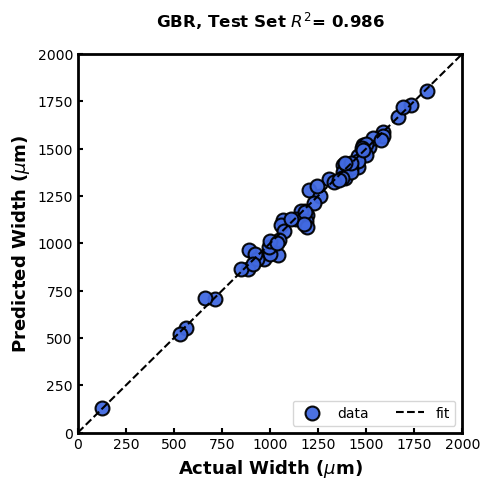

In [35]:
fig, (ax2) = plt.subplots(1, figsize=(5, 5), dpi=100, tight_layout=True)
widths = 2
width = 0.8  # the width of the bars
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
plt.tick_params(direction = 'in', width = tick_width)

ax2.set_title('GBR, Test Set $R^2$= ' + str('%.3f' % GBR_w_R2), weight='bold', y=1.05)
ax2.scatter(y_test_real_w, y_test_predict_w, c='royalblue', s=100, edgecolors='black',linewidths = 1.5, alpha= 0.95)
ax2.plot([0,2000],[0,2000], '--k')
ax2.set_xlim(0,2000)
ax2.set_ylim(0,2000)

ax2.set_xlabel('Actual Width ($\mu$m)', weight='bold', fontsize=13)

#############

ax2.set_ylabel('Predicted Width ($\mu$m)', weight='bold', fontsize=13)

#############

plt.legend(["data", "fit"], ncol = 2 , loc = "lower right")
#plt.savefig('R2-GBR-fit.png', dpi=600)
plt.show()


In [36]:
pickle.dump(GBR_w, open('regmodel_width.pk1', 'wb'))
pickled_model_width = pickle.load(open('regmodel_width.pk1', 'rb'))
pickled_model_width.predict(X_test_w)

array([1120.5246796 ,  965.52082844, 1282.8798077 ,  549.86870874,
       1517.95439866, 1168.67922954, 1665.15635475, 1248.9579477 ,
       1379.7668384 , 1410.99798751, 1212.31745144, 1504.40016465,
       1508.47095096, 1151.60059888, 1340.38184929, 1461.13630052,
       1588.896354  , 1403.10140557,  940.01153608,  918.11769594,
       1565.93084228, 1728.53215927,  943.9987439 , 1172.59184756,
       1095.10765703, 1064.65586787, 1466.75653795, 1114.84443122,
        703.19949515, 1433.02978771, 1018.55449496, 1396.2401946 ,
       1376.97922204, 1128.4002835 , 1418.10462533, 1346.90807898,
        863.88789762,  865.03498665, 1378.67354502, 1555.47135726,
       1165.28752472,  978.23751293, 1524.26387193, 1501.30003915,
       1013.01323713, 1490.04724135, 1343.48075063, 1804.16569483,
        916.38068665,  127.59842503, 1084.50337709,  941.231663  ,
        519.84541926, 1301.0325639 , 1100.57909013, 1717.25865833,
       1426.12110079, 1546.01280736,  892.75483514, 1422.13588